# 미세먼지 + 날씨 데이터 최종 EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("air_weather/merge_2002.csv", encoding='cp949')
data

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,주소,DATA_TINE,망,위도_x,경도_x,일시,기상관측위도,기상관측경도,거리,Unnamed: 0,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),시작일,종료일,지점주소,관리관서,위도_y,경도_y,노장해발고도(m),기압계(관측장비지상높이(m)),기온계(관측장비지상높이(m)),풍속계(관측장비지상높이(m)),강우계(관측장비지상높이(m)),풍향(deg)
0,경기 용인시,김량장동,131411,2002010101,-999.000,-999.0,-999.000,-999.000,-999.0,경기 용인시 김량장동,NaN,NaN,37.236955,127.203749,2002-01-01 01:00,37.2701,127.2218,4.097517,1132609.0,549.0,용인,1.0,NaN,0.5,NaN,0.2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.10.23,NaN,경기도 용인시처인구 포곡읍둔전리 사서함 1호(육군55사단),NaN,37.2701,127.2218,83.00,NaN,NaN,NaN,NaN,0.0
1,서울,한강대로,111122,2002010101,0.007,0.9,-999.000,-999.000,61.0,서울 용산구 동자동,NaN,NaN,37.552341,126.972128,2002-01-01 01:00,37.5524,126.9874,1.686715,899645.0,419.0,중구,-1.4,NaN,0.0,NaN,3.8,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.7.23,NaN,서울특별시 중구소파로 83남산케이블카,NaN,37.5524,126.9874,267.05,NaN,NaN,NaN,NaN,302.5
2,서울,금천구,111281,2002010101,0.012,-999.0,0.002,0.037,43.0,서울 금천구 시흥5동,NaN,NaN,37.449286,126.910466,2002-01-01 01:00,37.4655,126.9002,2.114859,891014.0,417.0,금천,1.0,NaN,0.0,NaN,3.1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.7.22,NaN,서울특별시 금천구시흥대로104길 31독산초등학교,NaN,37.4655,126.9002,45.00,NaN,NaN,NaN,NaN,335.0
3,대구 중구,남산동,422113,2002010101,0.019,3.2,0.004,0.077,213.0,대구 중구 남산동,NaN,NaN,35.861252,128.587109,2002-01-01 01:00,35.8651,128.5310,1.707439,2262651.0,846.0,대구서구,5.3,NaN,0.0,NaN,0.8,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.7.21,NaN,대구광역시 서구중리동 942-1상리배수지,대구(구 143),35.8651,128.5310,76.37,NaN,NaN,NaN,NaN,19.5
4,서울,궁동(폐쇄),111222,2002010101,0.003,0.6,0.005,0.022,48.0,서울 구로구 궁동,NaN,NaN,37.500307,126.828907,2002-01-01 01:00,37.4940,126.8270,0.730570,912651.0,423.0,구로,-0.4,NaN,0.0,NaN,3.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.8.16,NaN,서울특별시 구로구부일로 893온수초등학교,NaN,37.4940,126.8270,56.08,NaN,NaN,NaN,NaN,329.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687027,충북 제천시,장락동,633131,2002123124,0.008,1.8,0.006,0.041,88.0,충북 제천시 장락동,NaN,NaN,37.147659,128.227653,2002-12-31 24:00,37.1593,128.1943,3.424832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687028,제주 제주시,이도동,339111,2002123124,0.004,0.6,0.035,0.006,52.0,제주 제주시 이도2동,NaN,NaN,33.496986,126.535337,2002-12-31 24:00,33.5141,126.5297,1.924332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687029,부산 동구,초량동,221131,2002123124,0.009,0.7,0.032,0.024,-999.0,부산 동구 중앙대로,NaN,NaN,35.127087,129.047789,2002-12-31 24:00,35.1047,129.0320,2.894590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687030,충북 괴산군,청천면,633361,2002123124,0.003,1.0,0.021,0.004,93.0,충북 괴산군 청천면 송문로 덕평길,NaN,NaN,36.731600,127.803364,2002-12-31 24:00,36.6711,127.8617,7.664996

In [13]:
data_air = data.iloc[:,[4,5,6,7,8]]
data_air

,SO2,CO,O3,NO2,PM10
0,-999.000,-999.0,-999.000,-999.000,-999.0
1,0.007,0.9,-999.000,-999.000,61.0
2,0.012,-999.0,0.002,0.037,43.0
3,0.019,3.2,0.004,0.077,213.0
4,0.003,0.6,0.005,0.022,48.0
...,...,...,...,...,...
1687027,0.008,1.8,0.006,0.041,88.0
1687028,0.004,0.6,0.035,0.006,52.0
1687029,0.009,0.7,0.032,0.024,-999.0
1687030,0.003,1.0,0.021,0.004,93.0


In [26]:
drop_index1 = list(data_air[data_air['SO2']< -998].index)
drop_index2 = list(data_air[data_air['CO']< -998].index)
drop_index3 = list(data_air[data_air['O3']< -998].index)
drop_index4 = list(data_air[data_air['NO2']< -998].index)
drop_index5 = list(data_air[data_air['PM10']< -998].index)

drop_index = drop_index1 + drop_index2 + drop_index3 + drop_index4 + drop_index5
# drop_index.append(drop_index1)
# drop_index.append(drop_index2) 
# drop_index.append(drop_index3) 
# drop_index.append(drop_index4) 
# drop_index.append(drop_index5)

# drop_index = set(drop_index)
# drop_index = list(drop_index)
# print(len(drop_index))
# print(drop_index[:5])

In [28]:
drop_index = set(drop_index)
drop_index = list(drop_index)
drop_index

[0,
 1,
 2,
 5,
 1048581,
 1048584,
 9,
 1048587,
 1048588,
 1048591,
 17,
 19,
 26,
 1048604,
 28,
 1048610,
 1048612,
 38,
 1048615,
 1048616,
 1048617,
 42,
 43,
 1048620,
 1048619,
 1048624,
 49,
 1048626,
 55,
 57,
 1048635,
 61,
 64,
 65,
 1048642,
 66,
 70,
 1048647,
 73,
 1048654,
 79,
 1048655,
 1048657,
 82,
 83,
 1048659,
 1048656,
 1048664,
 1048665,
 90,
 1048666,
 1048667,
 93,
 94,
 1048670,
 96,
 1048673,
 1048674,
 1048675,
 1048678,
 104,
 1048680,
 1048686,
 110,
 112,
 115,
 116,
 1048693,
 1048694,
 119,
 123,
 1048699,
 128,
 129,
 1048707,
 132,
 133,
 1048709,
 138,
 1048715,
 1048717,
 141,
 144,
 1048720,
 146,
 1048722,
 149,
 1048727,
 152,
 156,
 157,
 1048737,
 1048739,
 1048741,
 168,
 169,
 1048746,
 174,
 177,
 178,
 181,
 182,
 185,
 1048761,
 1048766,
 191,
 193,
 195,
 197,
 198,
 201,
 202,
 1048778,
 1048781,
 206,
 209,
 1048785,
 1048790,
 215,
 216,
 1048792,
 1048796,
 222,
 224,
 1048801,
 225,
 1048802,
 231,
 1048809,
 1048812,
 1048813,
 10

In [29]:
len(drop_index)

429827

In [30]:
data.drop(drop_index, inplace=True)

In [3]:
for y in ['01','02','03','04','05']: # ,'06','07','08','09,'10','11','12','13','14','15','16','17','18','19','20'
    path = 'air_weather/merge_20{}.csv'.format(y)
    globals()['data_{}'.format(y)] = pd.read_csv(path, encoding='cp949')
data01_05 = pd.concat([data_01,data_02,data_03,data_04,data_05],ignore_index = True) #,data_06,data_07,data_08,data_09

#data.to_csv("air_2001-2020/air_20{}.csv".format(y), index=False)

In [4]:
data01_05.head()

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,주소,DATA_TINE,PM25,망,위도_x,경도_x,동,1단계_x,2단계,일시,기상관측위도,기상관측경도,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),시작일,종료일,지점주소,관리관서,위도_y,경도_y,노장해발고도(m),기압계(관측장비지상높이(m)),기온계(관측장비지상높이(m)),풍속계(관측장비지상높이(m)),강우계(관측장비지상높이(m)),풍향(deg),1단계_y
0,서울,중구,111121,2001010101,0.010,0.8,0.012,0.047,-999.0,서울 중구 서소문동,NaN,NaN,NaN,37.562895,126.97381,NaN,NaN,NaN,2001-01-01 01:00,37.5714,126.9658,108.0,서울,-8.0,0.0,NaN,NaN,1.8,0.0,50.0,0.0,63.0,0.0,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,2010-08-16,NaN,서울특별시 종로구송월길 52서울기상관측소,서울기상관측소(108),37.5714,126.9658,85.67,86.67,1.5,10.0,0.5,NaN,서울특별시
1,서울,중구,111121,2001010102,0.010,0.7,0.027,0.040,-999.0,서울 중구 서소문동,NaN,NaN,NaN,37.562895,126.97381,NaN,NaN,NaN,2001-01-01 02:00,37.5714,126.9658,108.0,서울,-8.6,0.0,NaN,NaN,1.1,0.0,50.0,0.0,61.0,0.0,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,9.0,NaN,NaN,NaN,NaN,2010-08-16,NaN,서울특별시 종로구송월길 52서울기상관측소,서울기상관측소(108),37.5714,126.9658,85.67,86.67,1.5,10.0,0.5,NaN,서울특별시
2,서울,중구,111121,2001010103,0.013,0.9,0.015,0.038,-999.0,서울 중구 서소문동,NaN,NaN,NaN,37.562895,126.97381,NaN,NaN,NaN,2001-01-01 03:00,37.5714,126.9658,108.0,서울,-8.3,0.0,NaN,NaN,0.8,0.0,20.0,0.0,62.0,0.0,2.0,-14.5,1011.5,0.0,1022.9,0.0,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0.0,NaN,NaN,800.0,4.0,19.0,-8.8,0.0,-5.0,-4.4,-0.2,1.7,2010-08-16,NaN,서울특별시 종로구송월길 52서울기상관측소,서울기상관측소(108),37.5714,126.9658,85.67,86.67,1.5,10.0,0.5,NaN,서울특별시
3,서울,중구,111121,2001010104,0.014,0.9,0.020,0.036,-999.0,서울 중구 서소문동,NaN,NaN,NaN,37.562895,126.97381,NaN,NaN,NaN,2001-01-01 04:00,37.5714,126.9658,108.0,서울,-8.2,0.0,NaN,NaN,0.9,0.0,270.0,0.0,65.0,0.0,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,9.0,NaN,NaN,NaN,NaN,2010-08-16,NaN,서울특별시 종로구송월길 52서울기상관측소,서울기상관측소(108),37.5714,126.9658,85.67,86.67,1.5,10.0,0.5,NaN,서울특별시
4,서울,중구,111121,2001010105,0.012,0.7,0.032,0.029,-999.0,서울 중구 서소문동,NaN,NaN,NaN,37.562895,126.97381,NaN,NaN,NaN,2001-01-01 05:00,37.5714,126.9658,108.0,서울,-9.1,0.0,NaN,NaN,2.6,0.0,50.0,0.0,66.0,0.0,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,9.0,NaN,NaN,NaN,NaN,2010-08-16,NaN,서울특별시 종로구송월길 52서울기상관측소,서울기상관측소(108),37.5714,126.9658,85.67,86.67,1.5,10.0,0.5,NaN,서울특별시


In [5]:
cols = list(data_01.columns)
cols

['지역',
 '측정소명',
 '측정소코드',
 '측정일시',
 'SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 '주소',
 'DATA_TINE',
 'PM25',
 '망',
 '위도_x',
 '경도_x',
 '동',
 '1단계_x',
 '2단계',
 '일시',
 '기상관측위도',
 '기상관측경도',
 '지점',
 '지점명',
 '기온(°C)',
 '기온 QC플래그',
 '강수량(mm)',
 '강수량 QC플래그',
 '풍속(m/s)',
 '풍속 QC플래그',
 '풍향(16방위)',
 '풍향 QC플래그',
 '습도(%)',
 '습도 QC플래그',
 '증기압(hPa)',
 '이슬점온도(°C)',
 '현지기압(hPa)',
 '현지기압 QC플래그',
 '해면기압(hPa)',
 '해면기압 QC플래그',
 '일조(hr)',
 '일조 QC플래그',
 '일사(MJ/m2)',
 '일사 QC플래그',
 '적설(cm)',
 '3시간신적설(cm)',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '운형(운형약어)',
 '최저운고(100m )',
 '시정(10m)',
 '지면상태(지면상태코드)',
 '현상번호(국내식)',
 '지면온도(°C)',
 '지면온도 QC플래그',
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '시작일',
 '종료일',
 '지점주소',
 '관리관서',
 '위도_y',
 '경도_y',
 '노장해발고도(m)',
 '기압계(관측장비지상높이(m))',
 '기온계(관측장비지상높이(m))',
 '풍속계(관측장비지상높이(m))',
 '강우계(관측장비지상높이(m))',
 '풍향(deg)',
 '1단계_y']

In [6]:
data_01.지점명.isnull().sum()

451877

In [7]:
numeric_feature = data_01.columns[(data_01.dtypes==int) | (data_01.dtypes== float)]
categorical_feature = data_01.columns[data_01.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'DATA_TINE', 'PM25', '망', '위도_x', '경도_x', '기상관측위도', '기상관측경도', '지점', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', '종료일', '위도_y', '경도_y', '노장해발고도(m)', '기압계(관측장비지상높이(m))', '기온계(관측장비지상높이(m))', '풍속계(관측장비지상높이(m))', '강우계(관측장비지상높이(m))', '풍향(deg)']
카테고리형 데이터는 다음과 같습니다. 
 ['지역', '측정소명', '주소', '동', '1단계_x', '2단계', '일시', '지점명', '운형(운형약어)', '시작일', '지점주소', '관리관서', '1단계_y']


# 결측치 50% 미만 변수들 사이 상관계수

In [8]:
def del_null_50(data):
    cols = list(data.columns)
    for c in cols:
        if data[c].isnull().sum() >= len(data)/2: # 50% 이상이 결측값인 경우
            data = data.drop([c], axis=1)
    print(data.shape)
    return data

In [9]:
data1 = del_null_50(data_01)
data2 = del_null_50(data_02)
data3 = del_null_50(data_03)
data4 = del_null_50(data_04)
data5 = del_null_50(data_05)
# data6 = del_null_50(data_06)
# data7 = del_null_50(data_07)
# data8 = del_null_50(data_08)
# data9 = del_null_50(data_09)

(1508568, 26)
(1687032, 28)
(1835568, 28)
(1339815, 18)
(2120001, 28)


In [10]:
data1.head()

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,주소,위도_x,경도_x,일시,기상관측위도,기상관측경도,지점,지점명,기온(°C),풍속(m/s),습도(%),시작일,지점주소,위도_y,경도_y,노장해발고도(m),1단계_y
0,서울,중구,111121,2001010101,0.010,0.8,0.012,0.047,-999.0,서울 중구 서소문동,37.562895,126.97381,2001-01-01 01:00,37.5714,126.9658,108.0,서울,-8.0,1.8,63.0,2010-08-16,서울특별시 종로구송월길 52서울기상관측소,37.5714,126.9658,85.67,서울특별시
1,서울,중구,111121,2001010102,0.010,0.7,0.027,0.040,-999.0,서울 중구 서소문동,37.562895,126.97381,2001-01-01 02:00,37.5714,126.9658,108.0,서울,-8.6,1.1,61.0,2010-08-16,서울특별시 종로구송월길 52서울기상관측소,37.5714,126.9658,85.67,서울특별시
2,서울,중구,111121,2001010103,0.013,0.9,0.015,0.038,-999.0,서울 중구 서소문동,37.562895,126.97381,2001-01-01 03:00,37.5714,126.9658,108.0,서울,-8.3,0.8,62.0,2010-08-16,서울특별시 종로구송월길 52서울기상관측소,37.5714,126.9658,85.67,서울특별시
3,서울,중구,111121,2001010104,0.014,0.9,0.020,0.036,-999.0,서울 중구 서소문동,37.562895,126.97381,2001-01-01 04:00,37.5714,126.9658,108.0,서울,-8.2,0.9,65.0,2010-08-16,서울특별시 종로구송월길 52서울기상관측소,37.5714,126.9658,85.67,서울특별시
4,서울,중구,111121,2001010105,0.012,0.7,0.032,0.029,-999.0,서울 중구 서소문동,37.562895,126.97381,2001-01-01 05:00,37.5714,126.9658,108.0,서울,-9.1,2.6,66.0,2010-08-16,서울특별시 종로구송월길 52서울기상관측소,37.5714,126.9658,85.67,서울특별시


In [12]:
data1_5 = del_null_50(data01_05)

(8490984, 26)


# Histogram

In [ ]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = data.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Heatmap

In [60]:
#상관관계 분석도
def corr_plot(data):
    plt.figure(figsize=(15,10))
    plt.rcParams['font.family'] = 'NanumGothic'

    heat_table = data.corr()
    mask = np.zeros_like(heat_table)
    mask[np.triu_indices_from(mask)] = True
    heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
    heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
    heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
    plt.title('correlation between features', fontsize=40)
    plt.show()

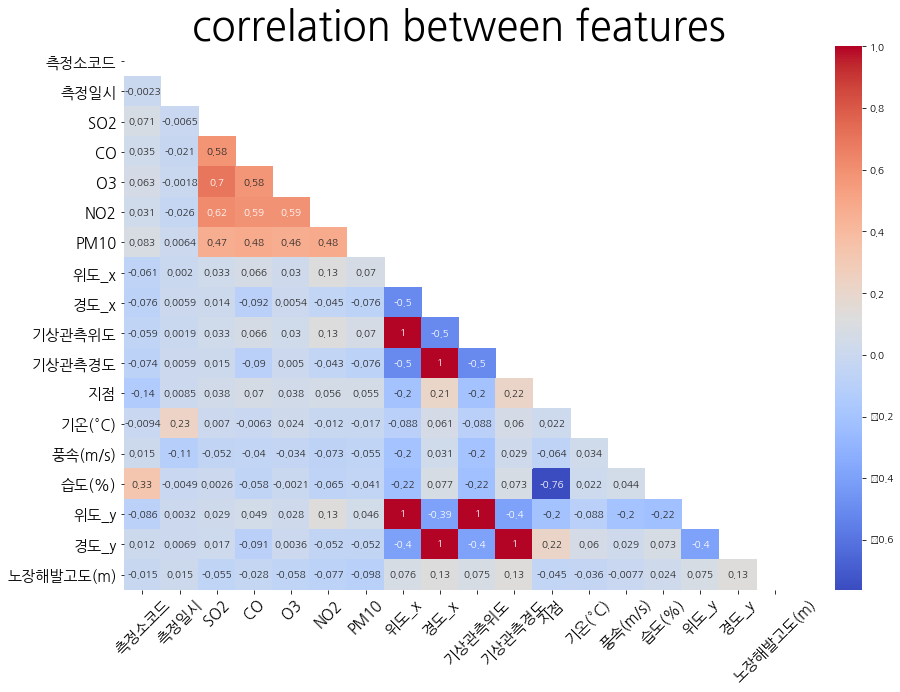

In [61]:
corr_plot(data1)

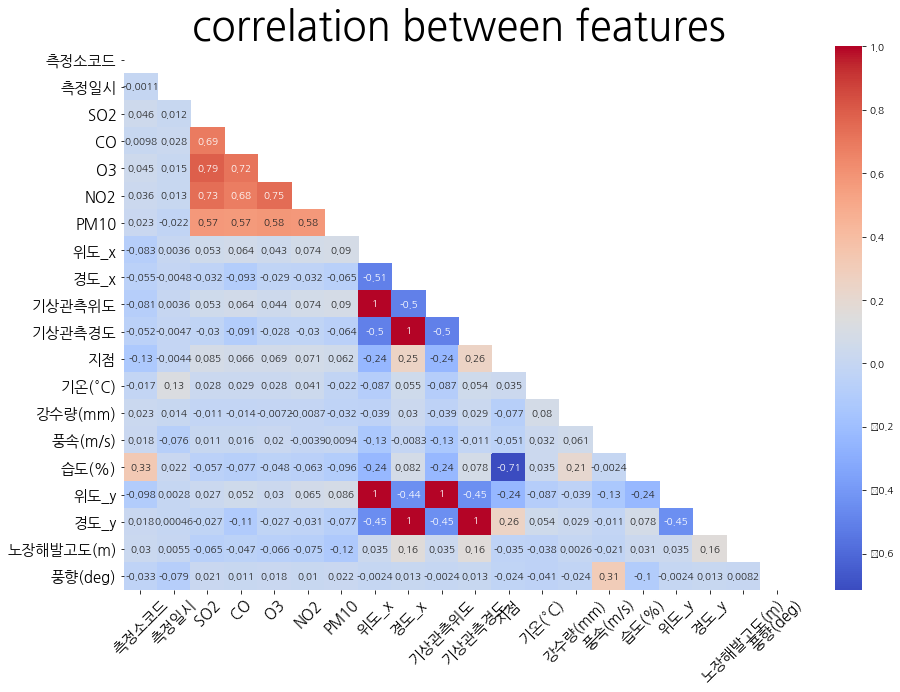

In [62]:
corr_plot(data2)

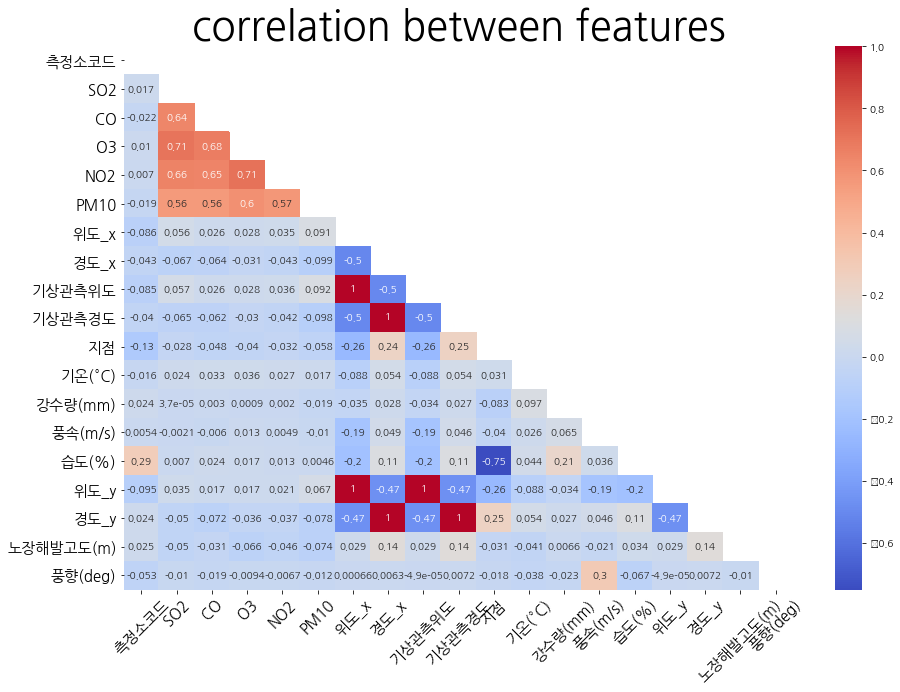

In [63]:
corr_plot(data3)

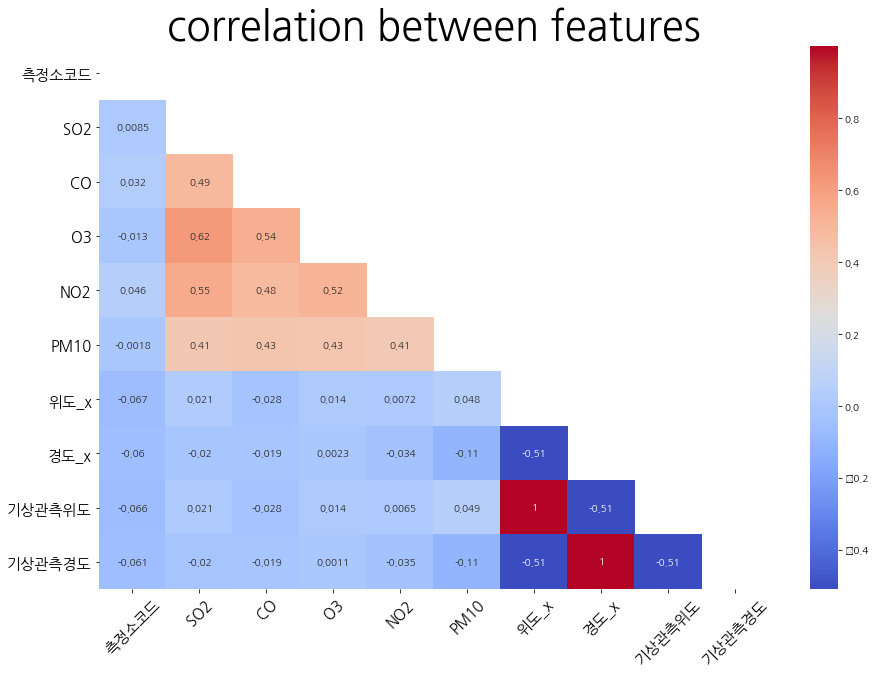

In [64]:
corr_plot(data4)

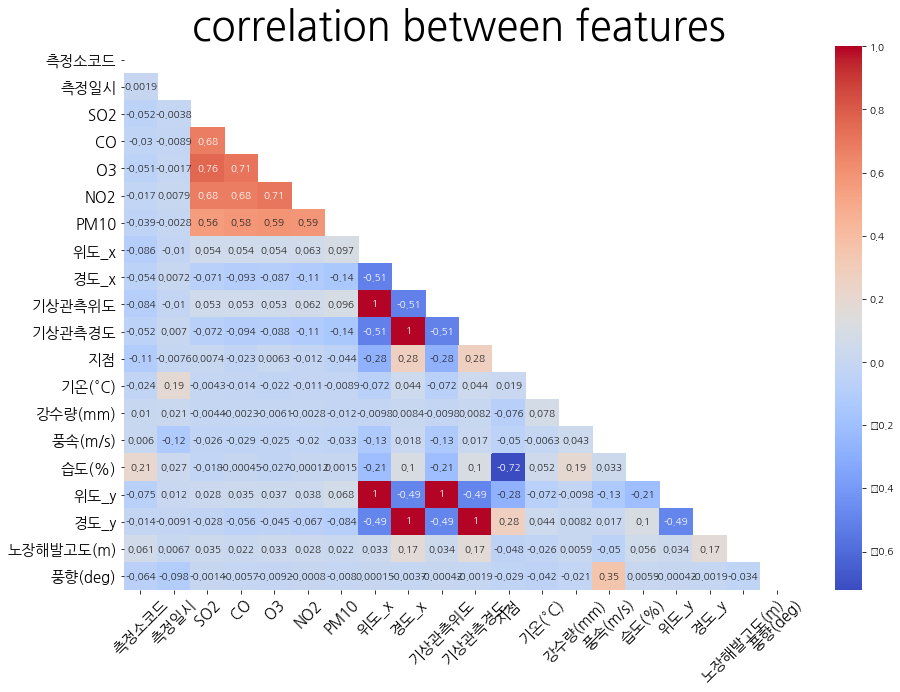

In [65]:
corr_plot(data5)

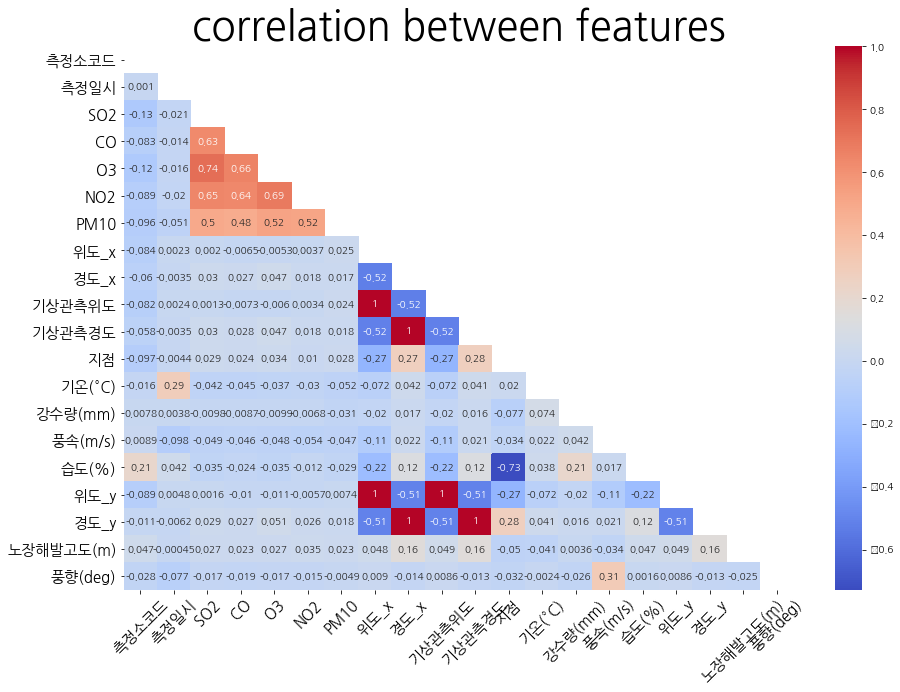

In [66]:
corr_plot(data6)

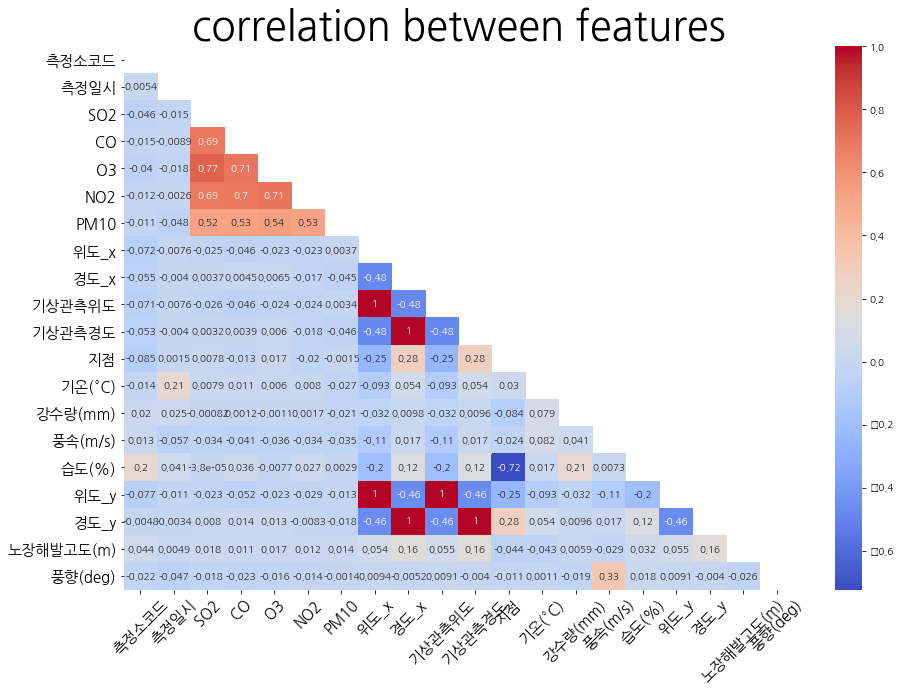

In [67]:
corr_plot(data7)

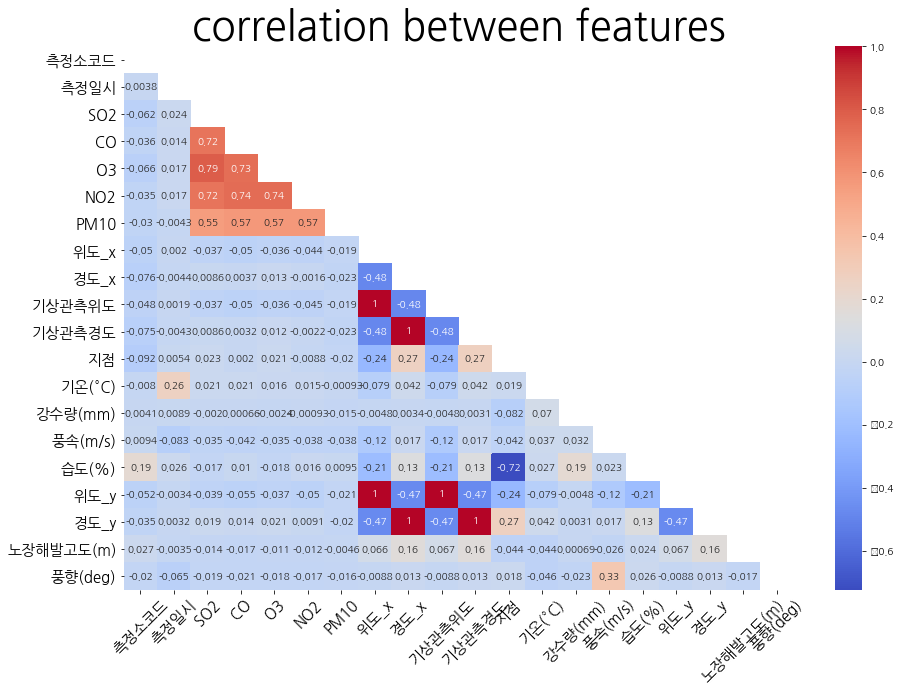

In [68]:
corr_plot(data8)

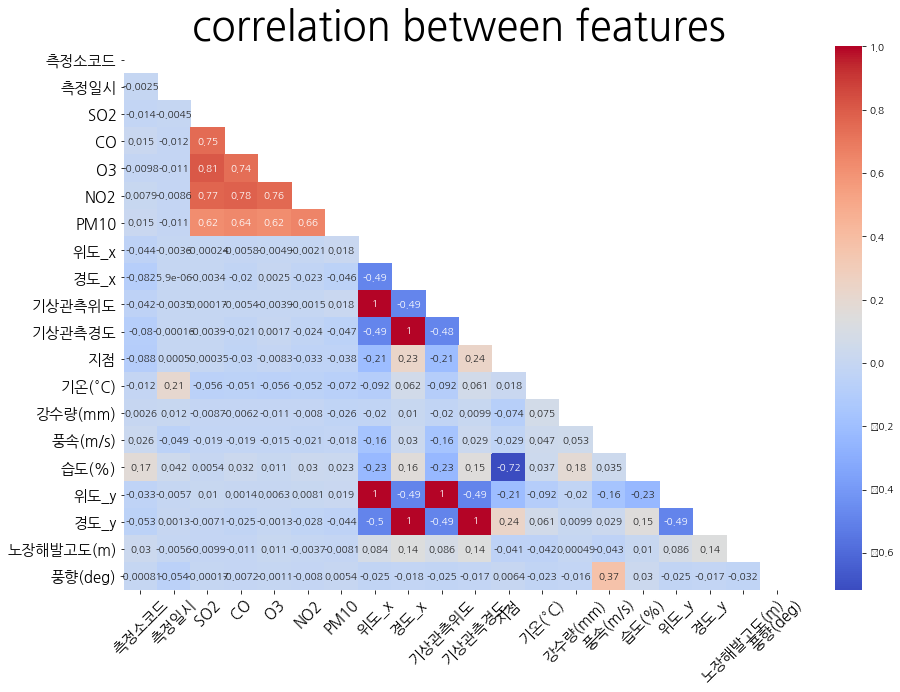

In [69]:
corr_plot(data9)

# Scatter Plot

In [13]:
numeric_feature = data1_5.columns[(data1_5.dtypes==int) | (data1_5.dtypes== float)]
categorical_feature = data1_5.columns[data1_5.dtypes=='O']

In [16]:
numeric_feature

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', '위도_x', '경도_x', '기상관측위도', '기상관측경도',
       '지점', '기온(°C)', '풍속(m/s)', '습도(%)', '위도_y', '경도_y', '노장해발고도(m)'],
      dtype='object')

In [15]:
categorical_feature

Index(['지역', '측정소명', '측정일시', '주소', '일시', '지점명', '시작일', '지점주소', '1단계_y'], dtype='object')

ValueError: num must be 1 <= num <= 16, not 17

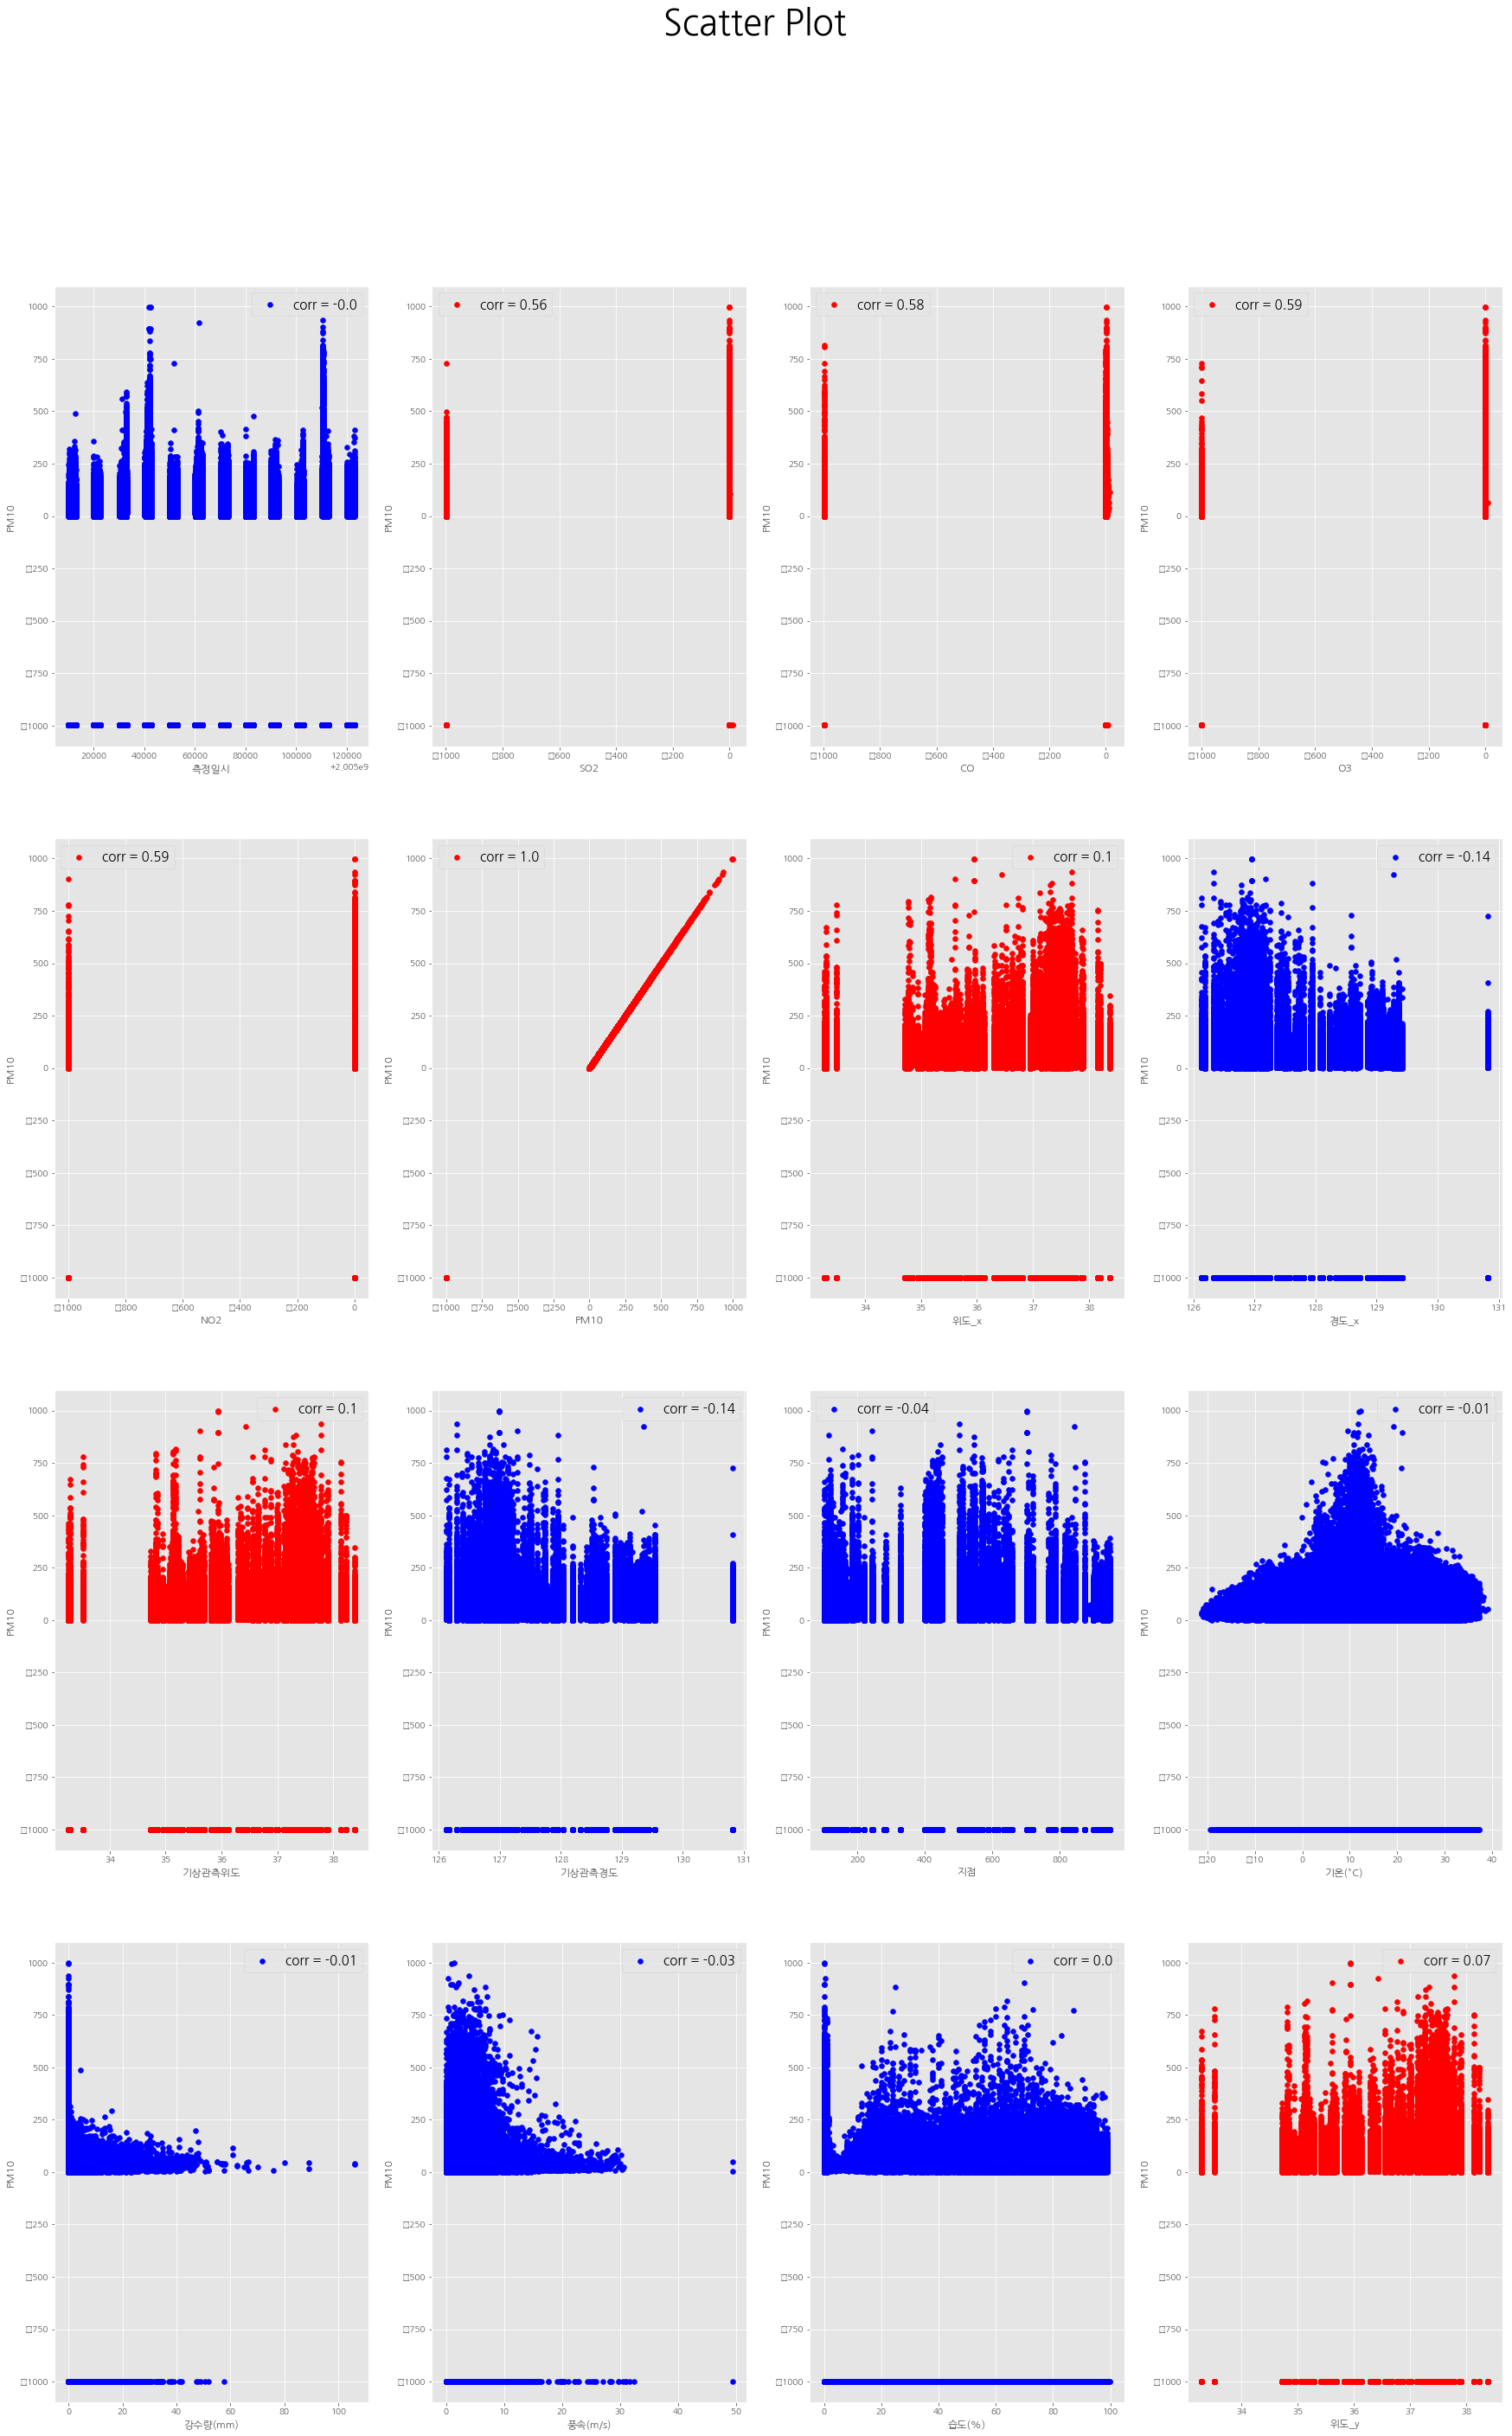

In [34]:
numeric_feature = data5.columns[(data5.dtypes==int) | (data5.dtypes== float)]
categorical_feature = data5.columns[data5.dtypes=='O']

feature = numeric_feature
target = "PM10"

plt.figure(figsize=(30,45))
plt.suptitle("Scatter Plot", fontsize=40)
plt.rcParams['font.family'] = 'NanumGothic'


for i in range(len(feature)):
    plt.subplot(4,4,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data5[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data5[feature[i]], data5[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
feature = numeric_feature
target = "PM10"

plt.figure(figsize=(30,45))
plt.suptitle("Scatter Plot", fontsize=40)
plt.rcParams['font.family'] = 'NanumGothic'


for i in range(len(feature)):
    plt.subplot(4,4,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data1_5[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data1_5[feature[i]], data1_5[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A9152FC0D8> (for post_execute):


KeyboardInterrupt: 

# Box Plot

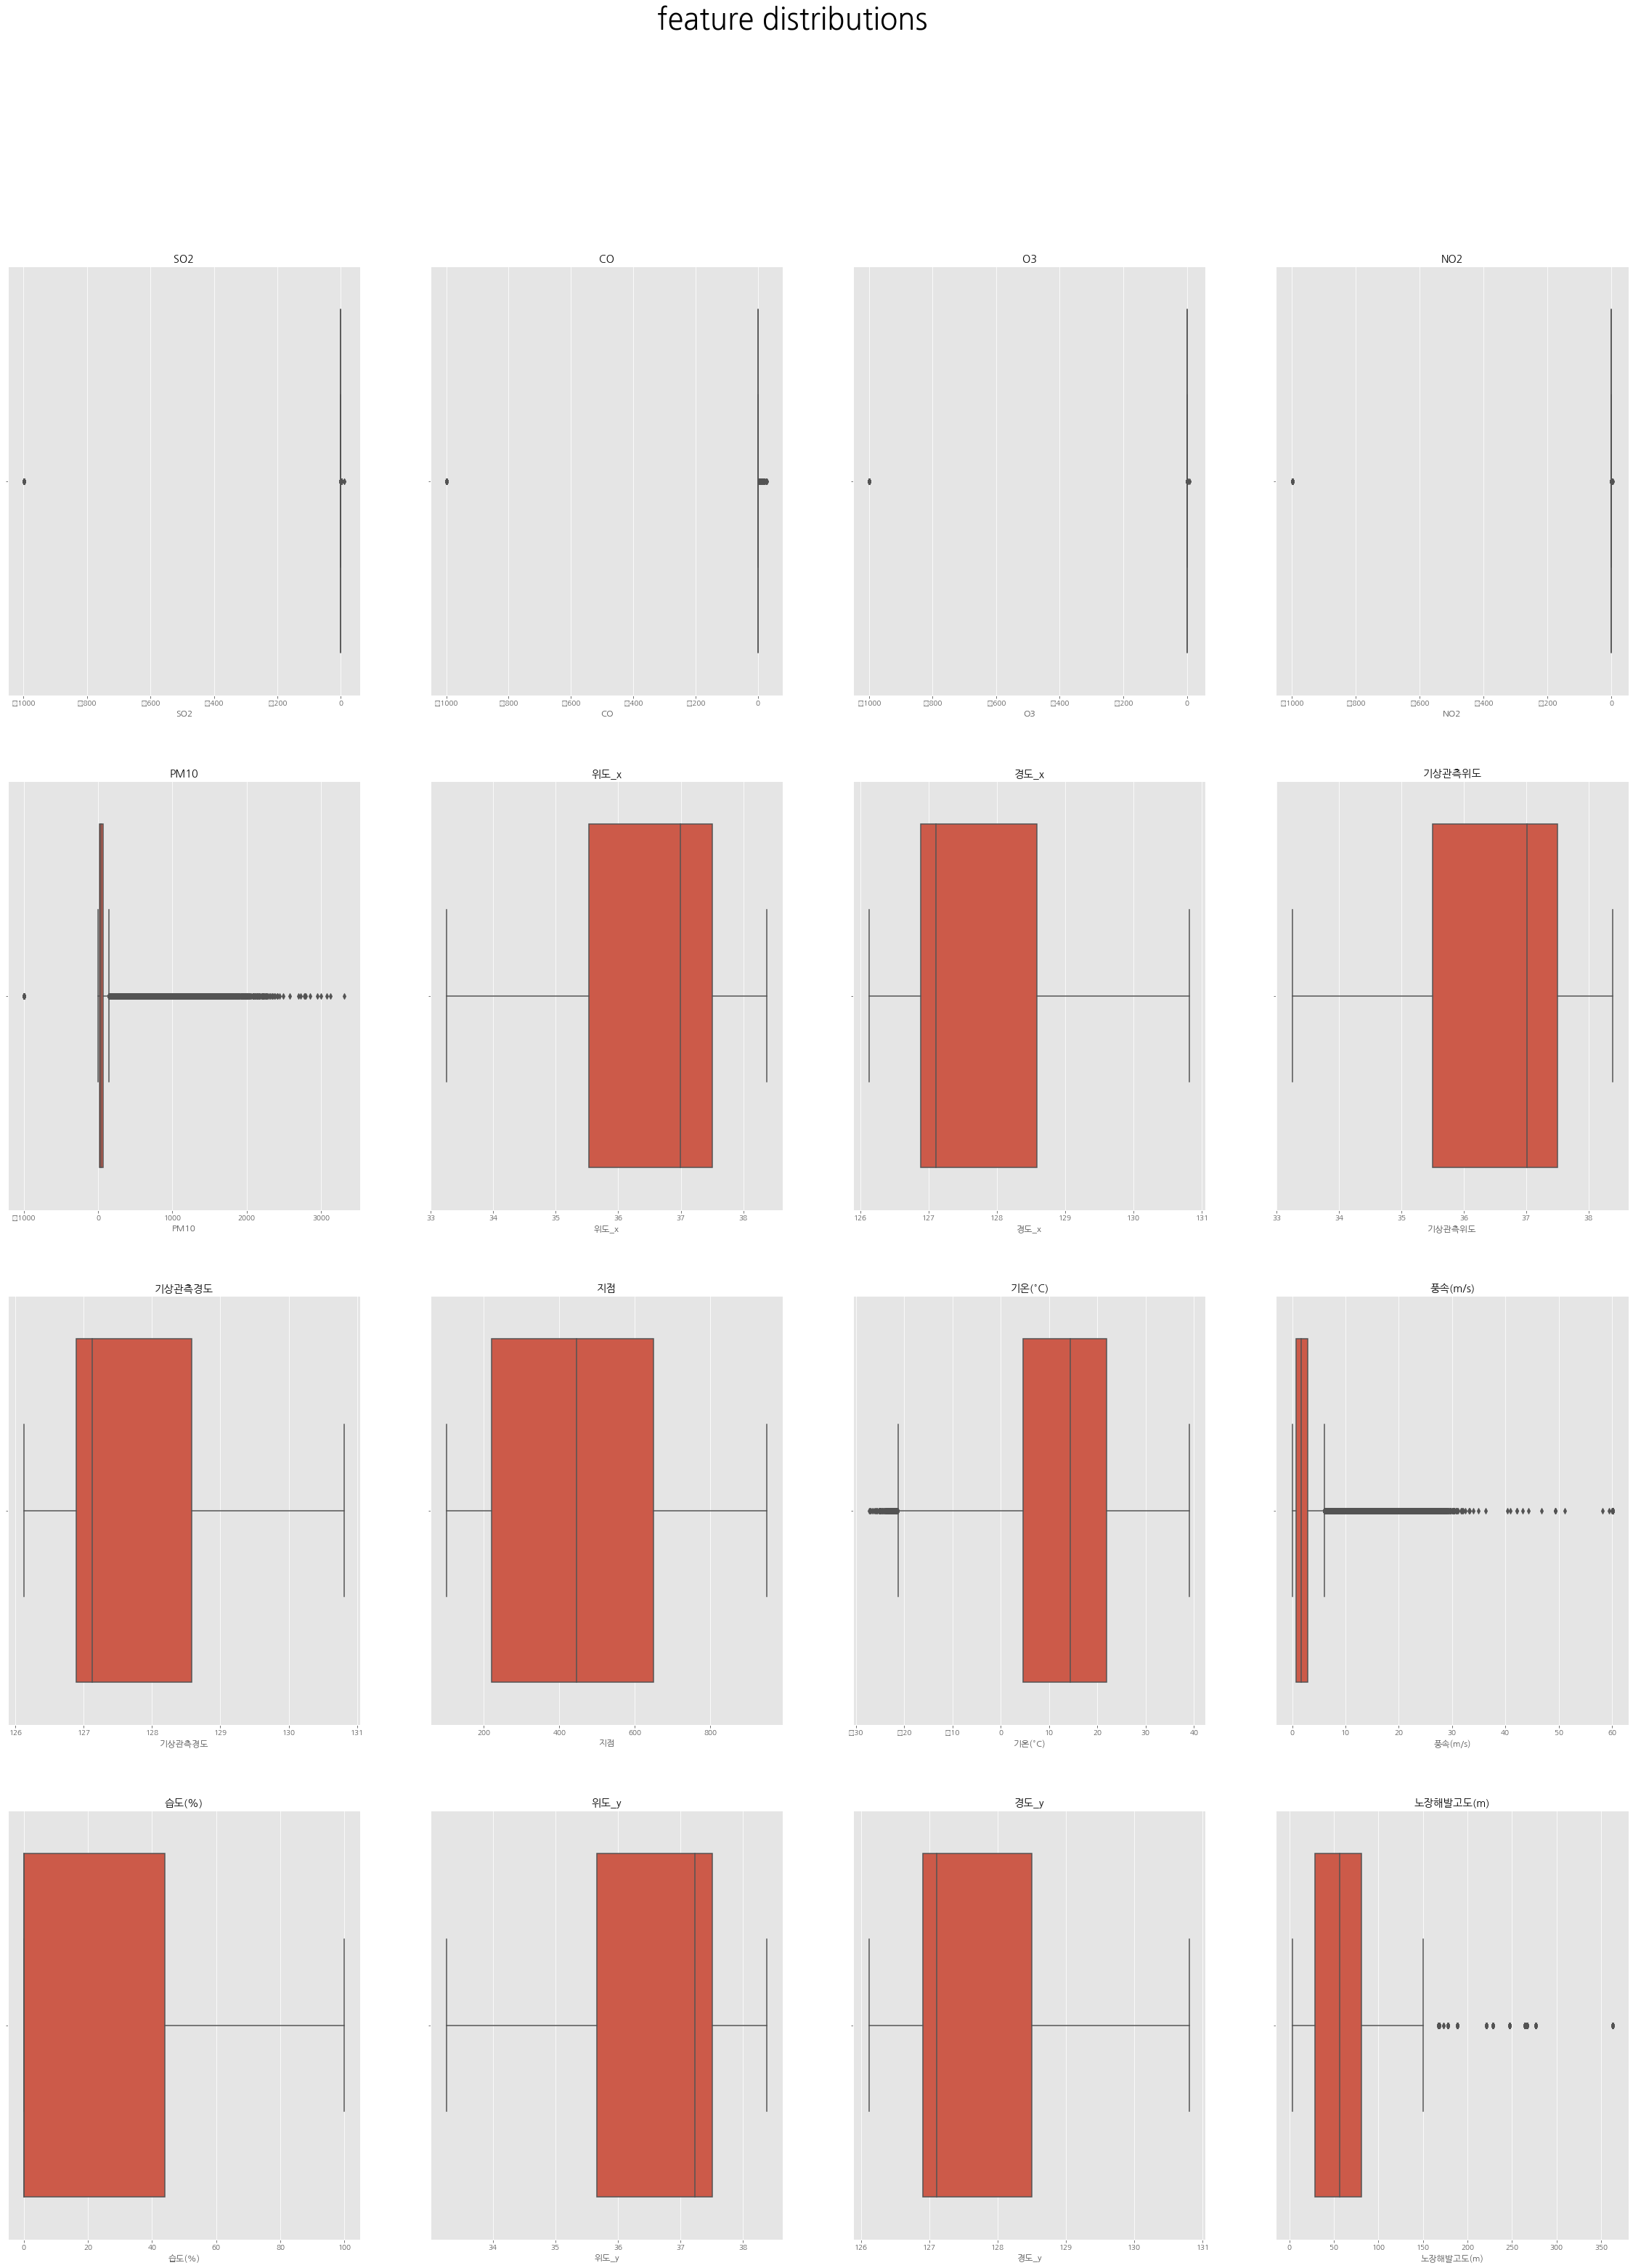

In [27]:
# 수치형 데이터 분리
# numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data1_5[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(4, 4, figsize=(40, 50))

fig.suptitle('feature distributions', fontsize= 40)
for i in range(len(feature)):
    plt.subplot(4,4,i+1) 
    plt.title(feature[i])
    sns.boxplot(data1_5[feature[i]])
plt.show()

# 범주형 변수

In [28]:
categorical_feature

Index(['지역', '측정소명', '측정일시', '주소', '일시', '지점명', '시작일', '지점주소', '1단계_y'], dtype='object')

KeyboardInterrupt: 

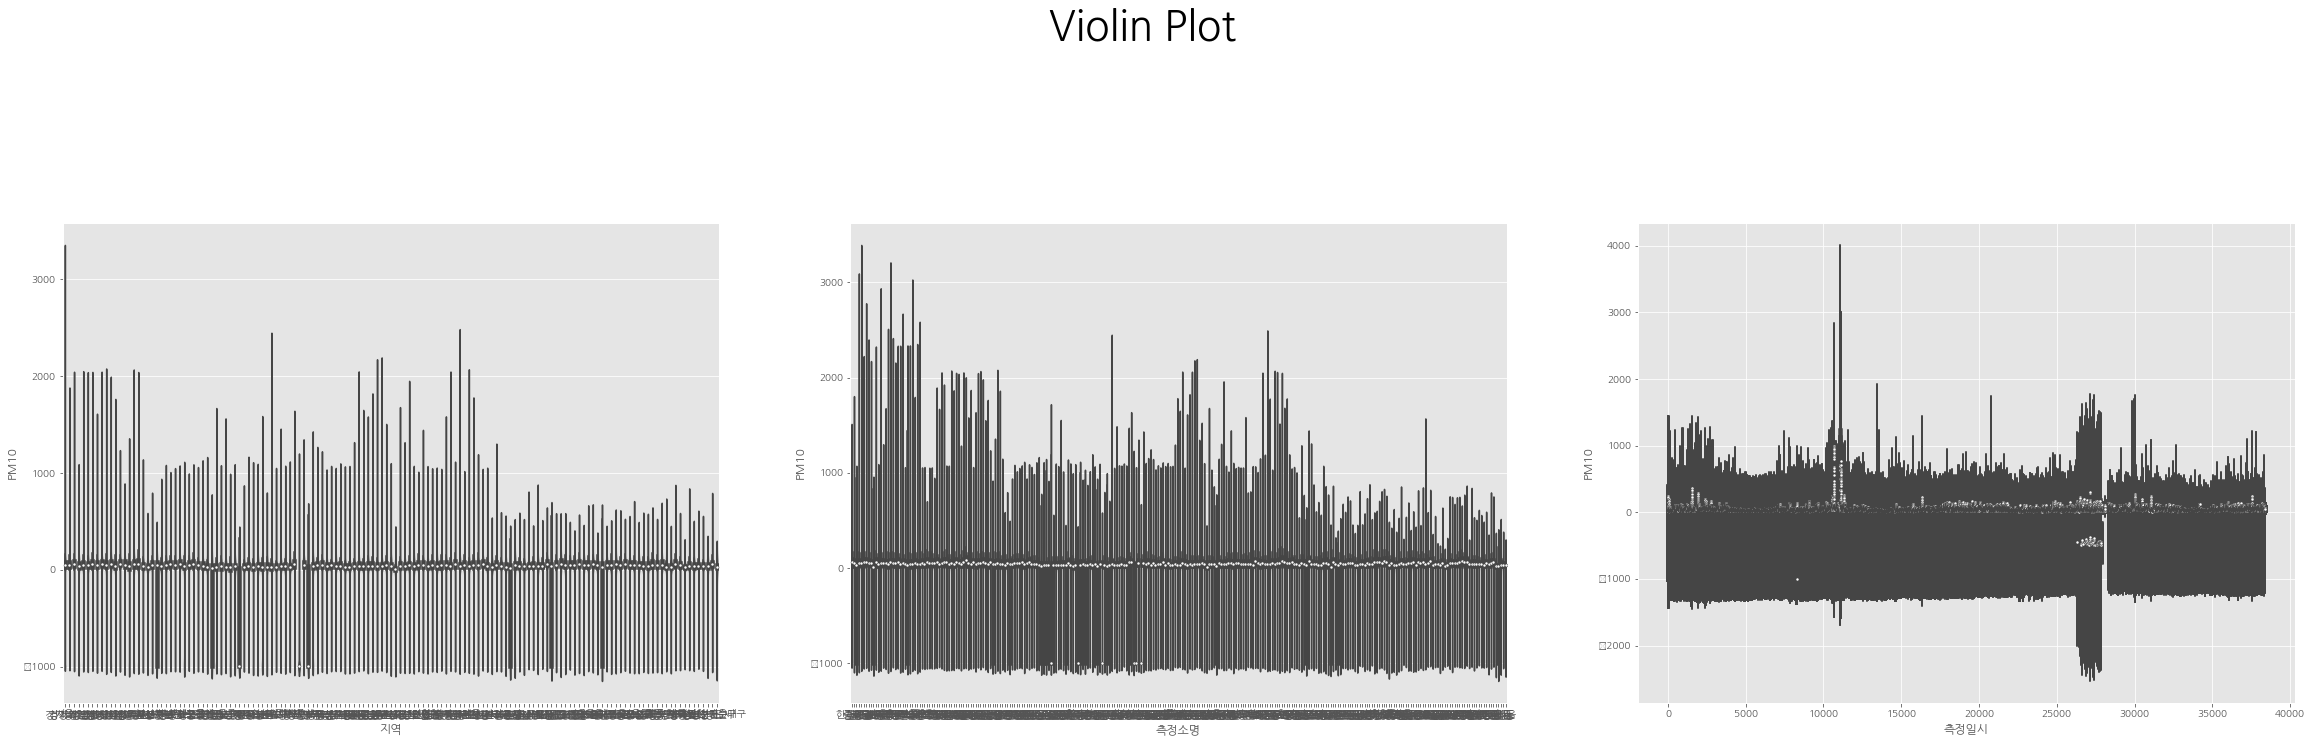

In [31]:
# 타겟 설정
target = "PM10"
# 범주형 데이터 분리
# categorical_feature = data1_5.columns[data1_5.dtypes=='object']

plt.figure(figsize=(40,30))
plt.suptitle("Violin Plot", fontsize=40)

for i in range(len(categorical_feature)):
    plt.subplot(3,3,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data1_5[categorical_feature[i]], y= data1_5[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 연도별, 월별, 시간대별 대기오염도

https://medium.com/bondata/%EC%B4%88%EC%8B%AC%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-eda-%EA%B0%80%EC%9D%B4%EB%93%9C%EB%9D%BC%EC%9D%B8-%EC%8B%A4%EC%8A%B5-62d11f93e17e 

### datetime

In [ ]:
# 컬럼명 재정의
pd.set_option('display.max_columns',None) # ...으로 요약 안 되게
data  = pd.read_csv('홍수zero_rawdata.csv')
# 강우: rf / 수위: wl
data.columns = ('num','year','month','day','time','inflow(y)','average_1','rfA_1','rfB_1','rfC_1','rfD_1','wlE_1','wlD_1','average_2','rfA_2','rfB_2','rfC_2','rfD_2','wlE_2','wlD_2','average_3','rfA_3','rfB_3','rfC_3','rfD_3','wlE_3','wlD_3','average_4','rfA_4','rfB_4','rfC_4','rfD_4','wlE_4','wlD_4','average_5','rfA_5','rfB_5','rfC_5','rfD_5','wlE_5','wlD_5','average_6','rfA_6','rfB_6','rfC_6','rfD_6','wlE_6','wlD_6')
data = data.iloc[1:,:].reset_index(drop=True)
#컬럼 순서 바꾸기(종속변수를 맨 뒤로)
data = data[['num','year','month','day','time','average_1','rfA_1','rfB_1','rfC_1','rfD_1','wlE_1','wlD_1','average_2','rfA_2','rfB_2','rfC_2','rfD_2','wlE_2','wlD_2','average_3','rfA_3','rfB_3','rfC_3','rfD_3','wlE_3','wlD_3','average_4','rfA_4','rfB_4','rfC_4','rfD_4','wlE_4','wlD_4','average_5','rfA_5','rfB_5','rfC_5','rfD_5','wlE_5','wlD_5','average_6','rfA_6','rfB_6','rfC_6','rfD_6','wlE_6','wlD_6','inflow(y)']]
df1 = pd.DataFrame(data)
# date 변수 생성
y = ['0'+str(x)[:-2] if len(str(x)[:-2])==1 else str(x)[:-2] for x in df1['year']]
m = ['0'+str(x)[:-2] if len(str(x)[:-2])==1 else str(x)[:-2] for x in df1['month']]
d = ['0'+str(x)[:-2] if len(str(x)[:-2])==1 else str(x)[:-2] for x in df1['day']]
t = [x-1 for x in df1['time']]
t = ['0'+str(x)[:-2]+':00:00' if len(str(x)[:-2])==1 else str(x)[:-2]+':00:00' for x in df1['time']]
date = pd.DataFrame()
date['date'] = [np.nan for i in range(len(t))]
date['date'] = pd.DataFrame([y[i]+'-'+m[i]+'-'+d[i]+'-'+t[i] for i in range(len(y))])
df2 = pd.concat([date['date'],df1.iloc[:,5:]], axis=1)
df2.iloc[:,1:] = df2.iloc[:,1:].apply(pd.to_numeric, errors='coerce') #numeric으로
df2['date'] = df2['date'].apply(pd.to_datetime, errors='coerce') #datetime으로
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d-%H:%M:%S')
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day

df2 = df2[['date','year','month','day','average_1','rfA_1','rfB_1','rfC_1','rfD_1','wlE_1','wlD_1','average_2','rfA_2','rfB_2','rfC_2','rfD_2','wlE_2','wlD_2','average_3','rfA_3','rfB_3','rfC_3','rfD_3','wlE_3','wlD_3','average_4','rfA_4','rfB_4','rfC_4','rfD_4','wlE_4','wlD_4','average_5','rfA_5','rfB_5','rfC_5','rfD_5','wlE_5','wlD_5','average_6','rfA_6','rfB_6','rfC_6','rfD_6','wlE_6','wlD_6','inflow(y)']]

# 마무리
df = df2.copy() #전체 데이터
train = df2.iloc[0:2891,:].copy().reset_index(drop=True) #트레인셋
test = df2.iloc[2891:,:].copy().reset_index(drop=True) #테스트셋

In [ ]:
# seaborn의 distplot, shade 연한 하늘색 네모가 histogram
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(df_cut['trip_duration_min'],kde=False) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

In [ ]:
# 시간대 순(x축에 따라) 으로 정렬
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
df_cut['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다

In [ ]:
# 빈도가 적은 순으로 정렬
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
df_cut['start_hour'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다

In [ ]:
# start_station 대여 시작 지점별 빈도
# .nlargest(N) 는 N개 가장 큰 값을 가져와라
df_cut['start_station_name'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
df_cut['start_station_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 대여 시작 지역')
plt.title('상위 10개 대여 시작 지역과 대여 건수')
plt.show()

In [ ]:
# 성별 gender 별 usertype 분포
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='usertype',hue='gender',data=df_cut,palette='Set3')
cnt.set_xlabel("count")
cnt.set_ylabel("유저 타입")
plt.show()